# EDA

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Extracting

In [23]:
from etl.extract import data_from_summoner_name
summoner_name = "Oturam"
df = data_from_summoner_name(summoner_name, 10)
df.head()

,match_id,data_version,level,placement,puuid,Arcanist,Assassin,Bodyguard,Bruiser,Challenger,...,tier_unit_1,tier_unit_2,tier_unit_3,tier_unit_4,tier_unit_5,tier_unit_6,tier_unit_7,tier_unit_8,tier_unit_9,tier_unit_10
0,BR1_2464916541,5,5,8,AgCtAA0toQ3cWziIRpC-z0NdNVENQZOUp245pNmNTrjOr-...,NaN,NaN,4,NaN,4,...,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BR1_2464916541,5,8,3,9z-ng747GUlF9v09NSu9RxZHJCfoHumELo6AqAUuTrEPUk...,NaN,3,NaN,4,NaN,...,2,3,2,2,2,1,1,NaN,NaN,NaN
2,BR1_2464916541,5,8,4,wcd--Mo9AEvZpHSWeS2oweLfZdMa1PSpaQL2s6rB2MhkuA...,NaN,3,NaN,4,4,...,1,2,2,2,2,2,2,1,NaN,NaN
3,BR1_2464916541,5,7,7,nAbGX5O9CNt0TBMGSnPj5HazmAa-QUXYPmQbus0RJ0ePtw...,NaN,NaN,4,4,4,...,2,2,1,1,1,1,NaN,NaN,NaN,NaN
4,BR1_2464916541,5,9,2,l1CFPqEm_Q5uhdDxoKEcXlq5wXLlP_UwOKkyq0Hgkjhhm1...,NaN,NaN,NaN,4,NaN,...,2,2,2,1,2,2,2,1,NaN,NaN


# Cleaning

In [24]:
from etl.transform import get_clean_full_data, get_most_common_data
all_player_info, all_units, all_traits = get_clean_full_data(df)

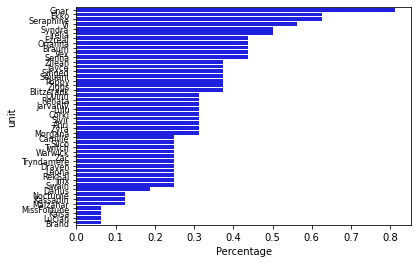

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df_units = get_most_common_data(all_units, name="unit")
df_units["quantity"] = df_units["quantity"] / df.shape[0]

fig, ax = plt.subplots() 

ax = sns.barplot(x="quantity",
                 y="unit",
                 color="blue",
                 data=df_units,
                 ax=ax)

ax.set_xlabel("Percentage")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.show()

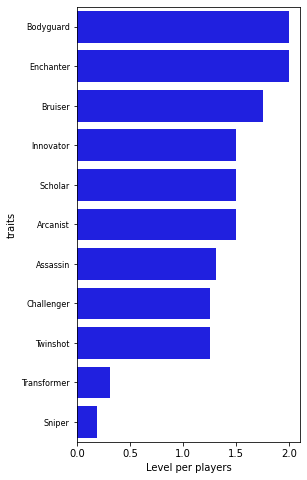

In [12]:
df_units = get_most_common_data(all_traits, name="traits")
df_units["quantity"] = df_units["quantity"] / df.shape[0]
plt.figure(figsize=(4,8)) 

ax = sns.barplot(x="quantity",
                 y="traits",
                 color="blue",
                 data=df_units)

ax.set_xlabel("Level per players")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.show()

# Top players

In [46]:
top_players = df[df["placement"].isin([1, 2, 3])]
top_players.head()

,match_id,data_version,level,placement,puuid,Arcanist,Assassin,Bodyguard,Bruiser,Challenger,...,tier_unit_0,tier_unit_1,tier_unit_2,tier_unit_3,tier_unit_4,tier_unit_5,tier_unit_6,tier_unit_7,tier_unit_8,tier_unit_9
4,BR1_2459013201,5,9,2,RNAOAfUbuqU9vMHgTkdvuom3IGDSPk8BR1H0jQzX8i4aFx...,NaN,NaN,NaN,4,4,...,2,2,2,2,2,2,2,2,2,NaN
5,BR1_2459013201,5,8,1,raFbU5PamnC1UkFnrzAfdd8OGI9LfK3ERzxAhRdv_EmtgB...,4,NaN,NaN,NaN,NaN,...,2,2,2,2,3,2,2,1,NaN,NaN
7,BR1_2459013201,5,8,3,lOjpV-_Bv0O9XhqRcFcBJwPWSmEXGXHWs76bHotiYSO-Yx...,4,3,4,NaN,NaN,...,3,3,3,2,3,1,1,1,NaN,NaN
10,BR1_2458781994,5,8,3,iu2kTov20Dc3Q75FR8-Cd10dh_JhJK_wpI55FoPueNLr3F...,NaN,3,4,NaN,NaN,...,2,3,1,3,3,3,2,1,NaN,NaN
12,BR1_2458781994,5,8,2,RNAOAfUbuqU9vMHgTkdvuom3IGDSPk8BR1H0jQzX8i4aFx...,4,NaN,4,4,4,...,2,2,2,2,2,1,2,NaN,NaN,NaN


In [55]:
all_player_info, all_units, all_traits = get_clean_full_data(df)

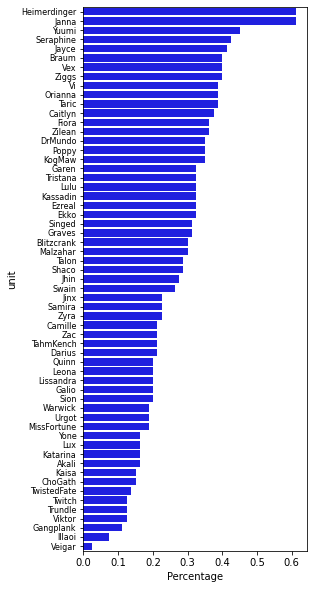

In [56]:
df_units = get_most_common_data(all_units, name="unit")
df_units["quantity"] = df_units["quantity"] / df.shape[0]

plt.figure(figsize=(4,10)) 

ax = sns.barplot(x="quantity",
                 y="unit",
                 color="blue",
                 data=df_units)

ax.set_xlabel("Percentage")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.show()

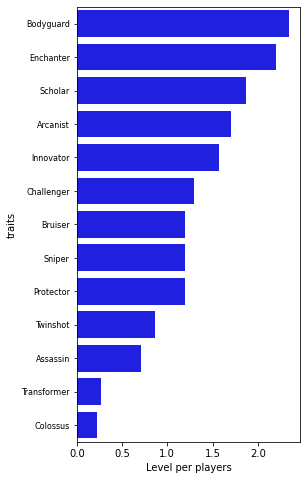

In [57]:
df_units = get_most_common_data(all_traits, name="traits")
df_units["quantity"] = df_units["quantity"] / df.shape[0]
plt.figure(figsize=(4,8)) 

ax = sns.barplot(x="quantity",
                 y="traits",
                 color="blue",
                 data=df_units)

ax.set_xlabel("Level per players")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.show()

# You (get PUIID)

In [ ]:
player_puuid = ...
you_df = df[df["puuid"] == player_puuid]